<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DIP Lab Assignment **7**
# N.Sai Karthik (AP21110010310) CSE-E



Take an image, Convert it to gray scale image. Perform degradation and restoration processes.


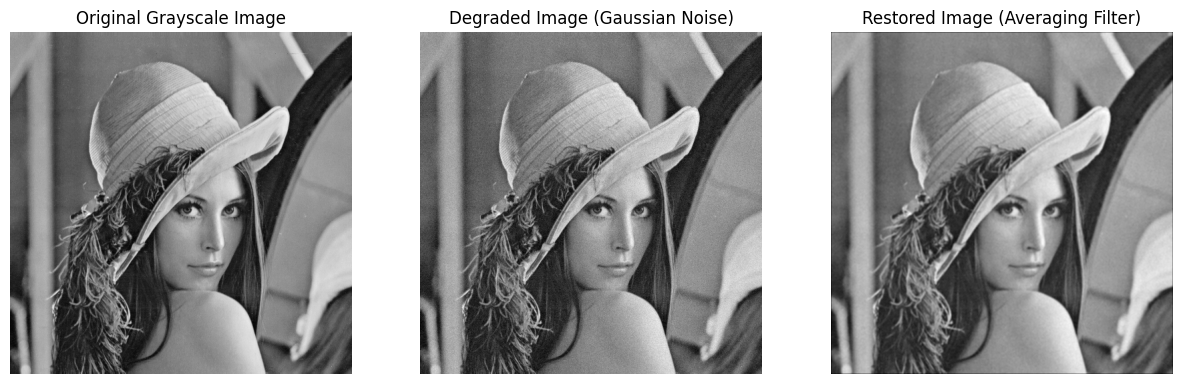

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convert_to_grayscale(image):
    return np.mean(image, axis=2).astype(np.uint8)

def add_gaussian_noise(image, mean=0, var=30):
    sigma = var ** 0.5
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

def apply_averaging_filter(image, kernel_size=3):
    padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), 'constant', constant_values=0)
    restored_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            restored_image[i, j] = np.mean(region)

    return restored_image

image = cv2.imread('/content/drive/MyDrive/DIP /Lenna_(test_image).png')

gray_image = convert_to_grayscale(image)

noisy_image = add_gaussian_noise(gray_image, mean=0, var=30)

restored_image = apply_averaging_filter(noisy_image, kernel_size=3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Degraded Image (Gaussian Noise)')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Restored Image (Averaging Filter)')
plt.imshow(restored_image, cmap='gray')
plt.axis('off')

plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
